---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
from scripts.analise_exploratoria import *

FILES_DIRECTORY = 'dataset'
df, train_class_ids, test_ids, coluns_names = importar_dados(FILES_DIRECTORY)
df_train = df.loc[train_class_ids.index]
print("df_train size:", df_train.shape)

df_train size: (316, 15040)


## Significado de cada atributo

A base de dados contém amostras referentes a pacientes com quadro cliníco de AML(Leucemia Mieloide Aguda). A mesma está dividida em três partes:

### clinical_data
Dados referentes ao formulário de cadastro do paciente na clinica. Há uma análise de cada atributo na tabela abaixo:

| Atributo | Significado |
|---|---|
| Sample ID | Identificador da amostra |
| Diagnosis Age | Idade do paciente |
| Bone Marrow Blast Percentage | Porcentagem de blastos, que são células sanguineas imaturas na medula óssea |
| Mutation Count | Quantidade de mutações |
| PB Blast Percentage | Porcentagem de blastos no sangue periférico do paciente |
| WBC | Quantidade de células brancas, parte importante do sistema imunológico |
| Sex | Sexo do paciente |
| Race | Raça do paciente |
| Cytogenetic Info | Informação sobre a estrutura cromossômica |
| ELN Risk Classification | Classifica o nível de risco dos pacientes baseado na estrutura genética e molecular |
| Treatment Intensity | Intensidade do tratamento |

### genetic_expression
Dados da expressão genética de cada paciente. 

### genetic_mutation
Dados referentes a mutações gênicas em cada paciente.

## Medidas descritivas

### Dados clinícos

Tamanho do dataset: (316, 10)


'Quantidade de amostras por classe:'

1    204
0    112
Name: Overall Survival Status, dtype: int64

'Porcentagem de amostras por classe:'

1    0.64557
0    0.35443
Name: Overall Survival Status, dtype: float64

'Quantidade de amostras por sexo:'

M    172
F    144
Name: Sex, dtype: int64

'Quantidade de amostras por classificação de risco:'

2.0    155
3.0     87
1.0     74
Name: ELN Risk Classification, dtype: int64

'Quantidade de amostras por intensidade de tratamento:'

High intensity    126
Regular           114
Low intensity      46
Target therapy     30
Name: Treatment Intensity, dtype: int64

,Diagnosis Age,Bone Marrow Blast Percentage,Mutation Count,PB Blast Percentage,WBC,ELN Risk Classification
count,316.000000,274.000000,304.000000,274.000000,296.000000,316.000000
mean,55.496835,68.525547,9.812500,40.890146,40.378412,2.041139
std,15.741462,20.737157,6.094501,31.991555,59.300288,0.713732
min,18.000000,20.000000,1.000000,0.000000,0.500000,1.000000
25%,45.000000,52.000000,5.000000,9.125000,4.192500,2.000000
50%,58.000000,73.500000,9.000000,39.000000,17.900000,2.000000
75%,67.000000,86.000000,14.000000,69.500000,55.105000,3.000000
max,88.000000,100.000000,34.000000,99.200000,483.000000,3.000000


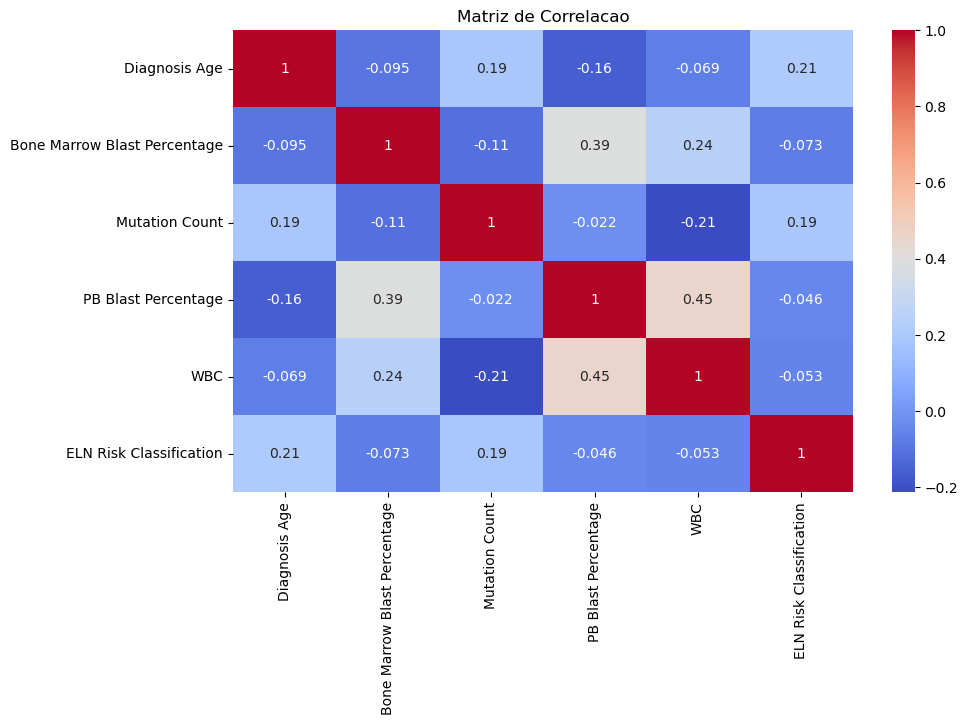

In [3]:
from scripts.analise_exploratoria import *

clinical_data = df_train.loc[:, coluns_names['clinical']]
print('Tamanho do dataset:', clinical_data.shape)
display('Quantidade de amostras por classe:', train_class_ids['Overall Survival Status'].value_counts())
display('Porcentagem de amostras por classe:', train_class_ids['Overall Survival Status'].value_counts(normalize=True))
display('Quantidade de amostras por sexo:', clinical_data['Sex'].value_counts())
display('Quantidade de amostras por classificação de risco:', clinical_data['ELN Risk Classification'].value_counts())
display('Quantidade de amostras por intensidade de tratamento:', clinical_data['Treatment Intensity'].value_counts())
display(clinical_data.describe())
matriz_de_correlacao(clinical_data)

### Expressões e Mutações Gênicas

In [5]:
from scripts.analise_exploratoria import *

genetic_expression_data = df_train.loc[:, coluns_names['genetic_expression']]
genetic_mutation_data = df_train.loc[:, coluns_names['genetic_mutation']]

print('Quantidade de expressões gênicas:', genetic_expression_data.shape[1])
print('Quantidade de valores nulos:', genetic_expression_data.isna().sum().sum())
print('Porcentagem de valores nulos:', genetic_expression_data.isna().sum().sum() / (genetic_expression_data.shape[0] * genetic_expression_data.shape[1]))
print()

print('Quantidade de mutações gênicas:', genetic_mutation_data.shape[1])
print('Quantidade de valores nulos:', genetic_mutation_data.isna().sum().sum())
print('Porcentagem de valores nulos:', genetic_mutation_data.isna().sum().sum() / (genetic_mutation_data.shape[0] * genetic_mutation_data.shape[1]))

Quantidade de expressões gênicas: 14712
Quantidade de valores nulos: 954956
Porcentagem de valores nulos: 0.20541140961309462

Quantidade de mutações gênicas: 318
Quantidade de valores nulos: 3498
Porcentagem de valores nulos: 0.03481012658227848


## Análise Geral dos atributos númericos

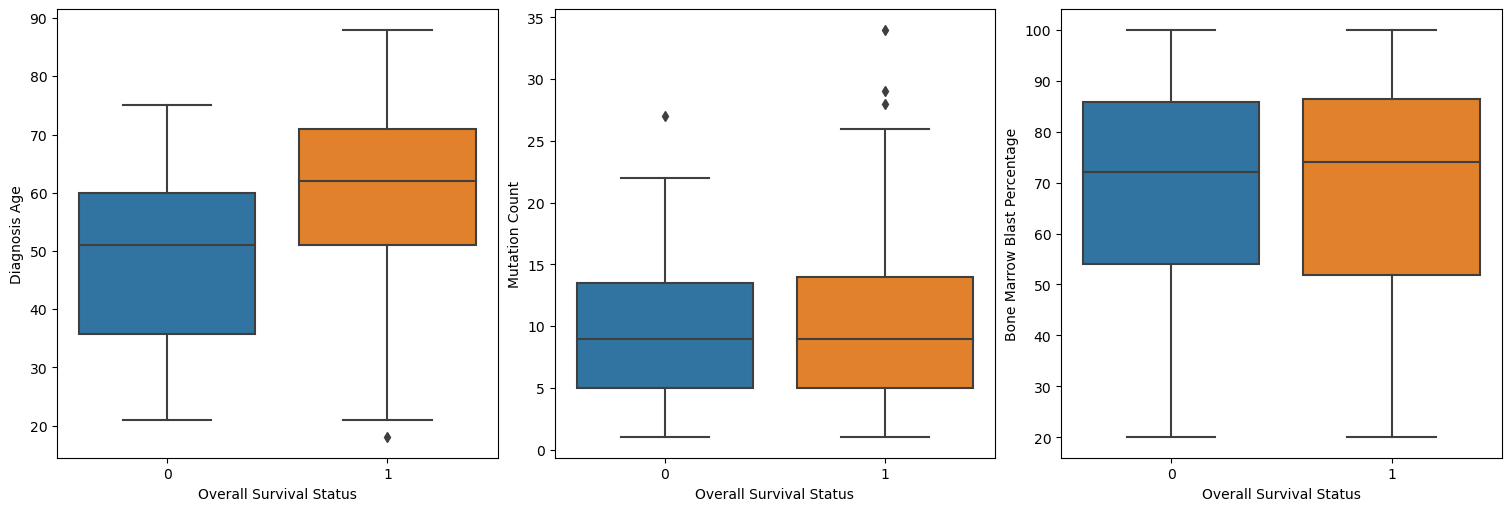

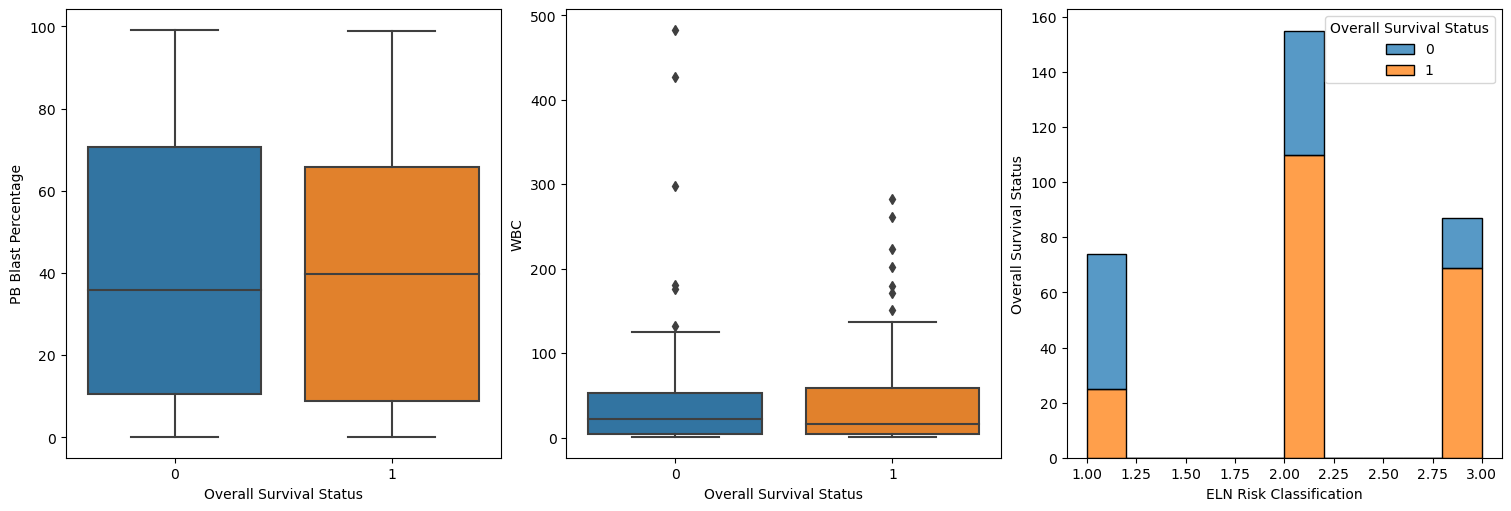

In [6]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 5))
boxplot(train_class_ids['Overall Survival Status'], df_train['Diagnosis Age'], xlabel='Diagnosis Age', ylabel='Overall Survival Status', ax=axes[0])
boxplot(train_class_ids['Overall Survival Status'], df_train['Mutation Count'], xlabel='Mutation Count', ylabel='Overall Survival Status', ax=axes[1])
boxplot(train_class_ids['Overall Survival Status'], df_train['Bone Marrow Blast Percentage'], xlabel='Bone Marrow Blast Percentage', ylabel='Overall Survival Status', ax=axes[2])

fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 5))
boxplot(train_class_ids['Overall Survival Status'], df_train['PB Blast Percentage'], xlabel='PB Blast Percentage', ylabel='Overall Survival Status', ax=axes[0])
boxplot(train_class_ids['Overall Survival Status'], df_train['WBC'], xlabel='WBC', ylabel='Overall Survival Status', ax=axes[1])
histograma(df_train['ELN Risk Classification'], train_class_ids['Overall Survival Status'], ax=axes[2], xlabel='ELN Risk Classification')

## Análise Geral dos atributos categóricos

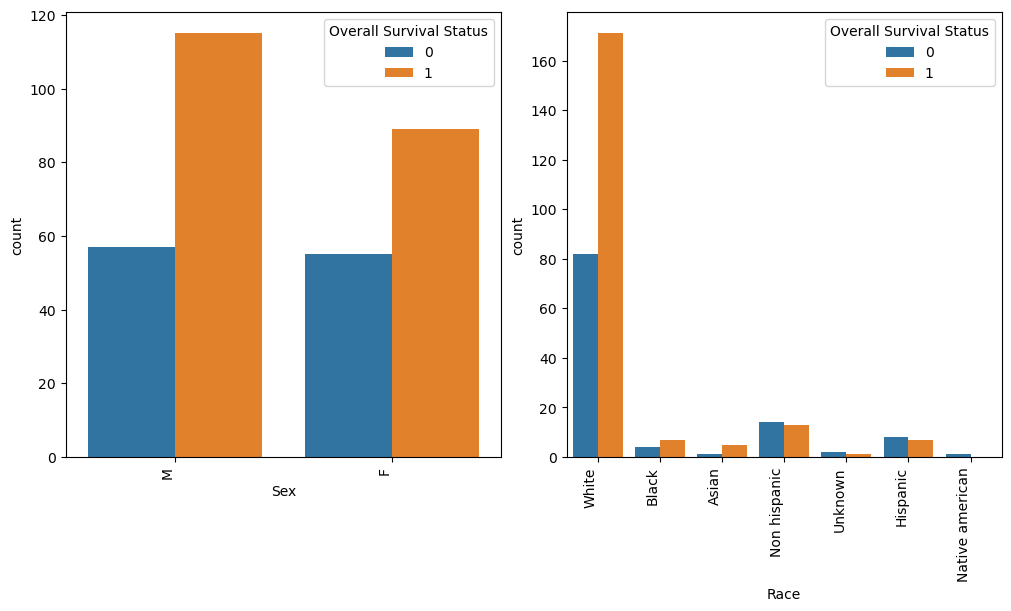

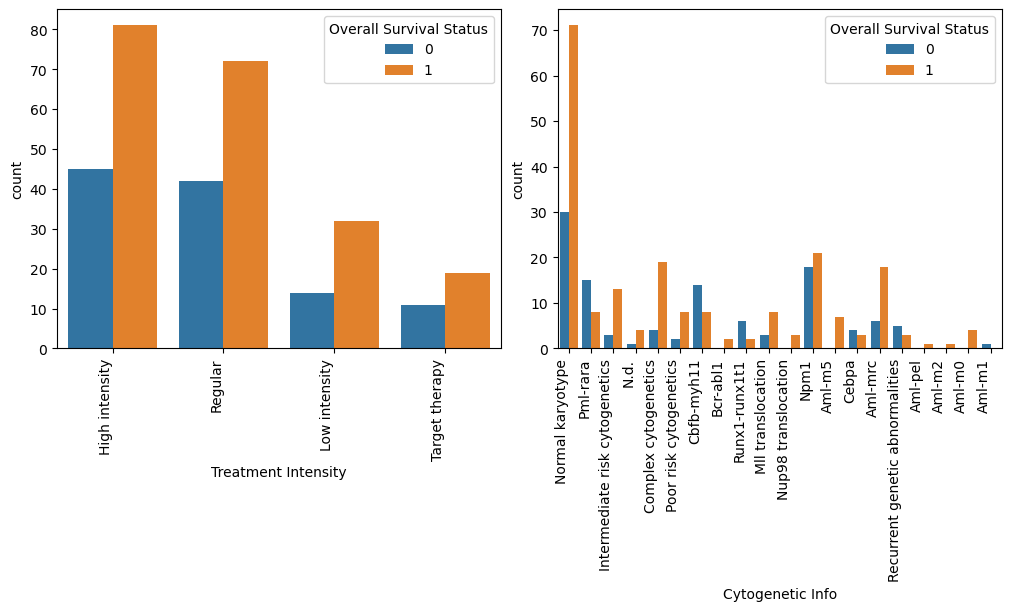

In [7]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 6))

grafico_de_barras(df_train['Sex'], train_class_ids['Overall Survival Status'], ax=axes[0])
grafico_de_barras(df_train['Race'], train_class_ids['Overall Survival Status'], ax=axes[1])

fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 6))
for ax in axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
grafico_de_barras(df_train['Treatment Intensity'], train_class_ids['Overall Survival Status'], ax=axes[0])
grafico_de_barras(df_train['Cytogenetic Info'], train_class_ids['Overall Survival Status'], ax=axes[1])

## Possíveis genes importantes

FLT 3, MICALL2, NPM1, NRAS, DNMT3A, KIT

In [100]:
df_genetic_expression_data = df.loc[:, coluns_names['genetic_expression']]
df_clinical_data = df.loc[:, coluns_names['clinical']]
df_genetic_mutation_data = df.loc[:, coluns_names['genetic_mutation']]

display(tabela_de_contingencia(df_genetic_mutation_data['FLT3_mutation'], train_class_ids['Overall Survival Status']))
display(tabela_de_contingencia(df_genetic_mutation_data['NPM1_mutation'], train_class_ids['Overall Survival Status']))
display(tabela_de_contingencia(df_genetic_mutation_data['NRAS_mutation'], train_class_ids['Overall Survival Status']))
display(tabela_de_contingencia(df_genetic_mutation_data['DNMT3A_mutation'], train_class_ids['Overall Survival Status']))
display(tabela_de_contingencia(df_genetic_mutation_data['KIT_mutation'], train_class_ids['Overall Survival Status']))

Overall Survival Status,0,1,count
FLT3_mutation,,,
0.0,0.356828,0.643172,227
1.0,0.333333,0.666667,78


Overall Survival Status,0,1,count
NPM1_mutation,,,
0.0,0.345291,0.654709,223
1.0,0.365854,0.634146,82


Overall Survival Status,0,1,count
NRAS_mutation,,,
0.0,0.350365,0.649635,274
1.0,0.354839,0.645161,31


Overall Survival Status,0,1,count
DNMT3A_mutation,,,
0.0,0.368201,0.631799,239
1.0,0.287879,0.712121,66


Overall Survival Status,0,1,count
KIT_mutation,,,
0.0,0.342373,0.657627,295
1.0,0.600000,0.400000,10


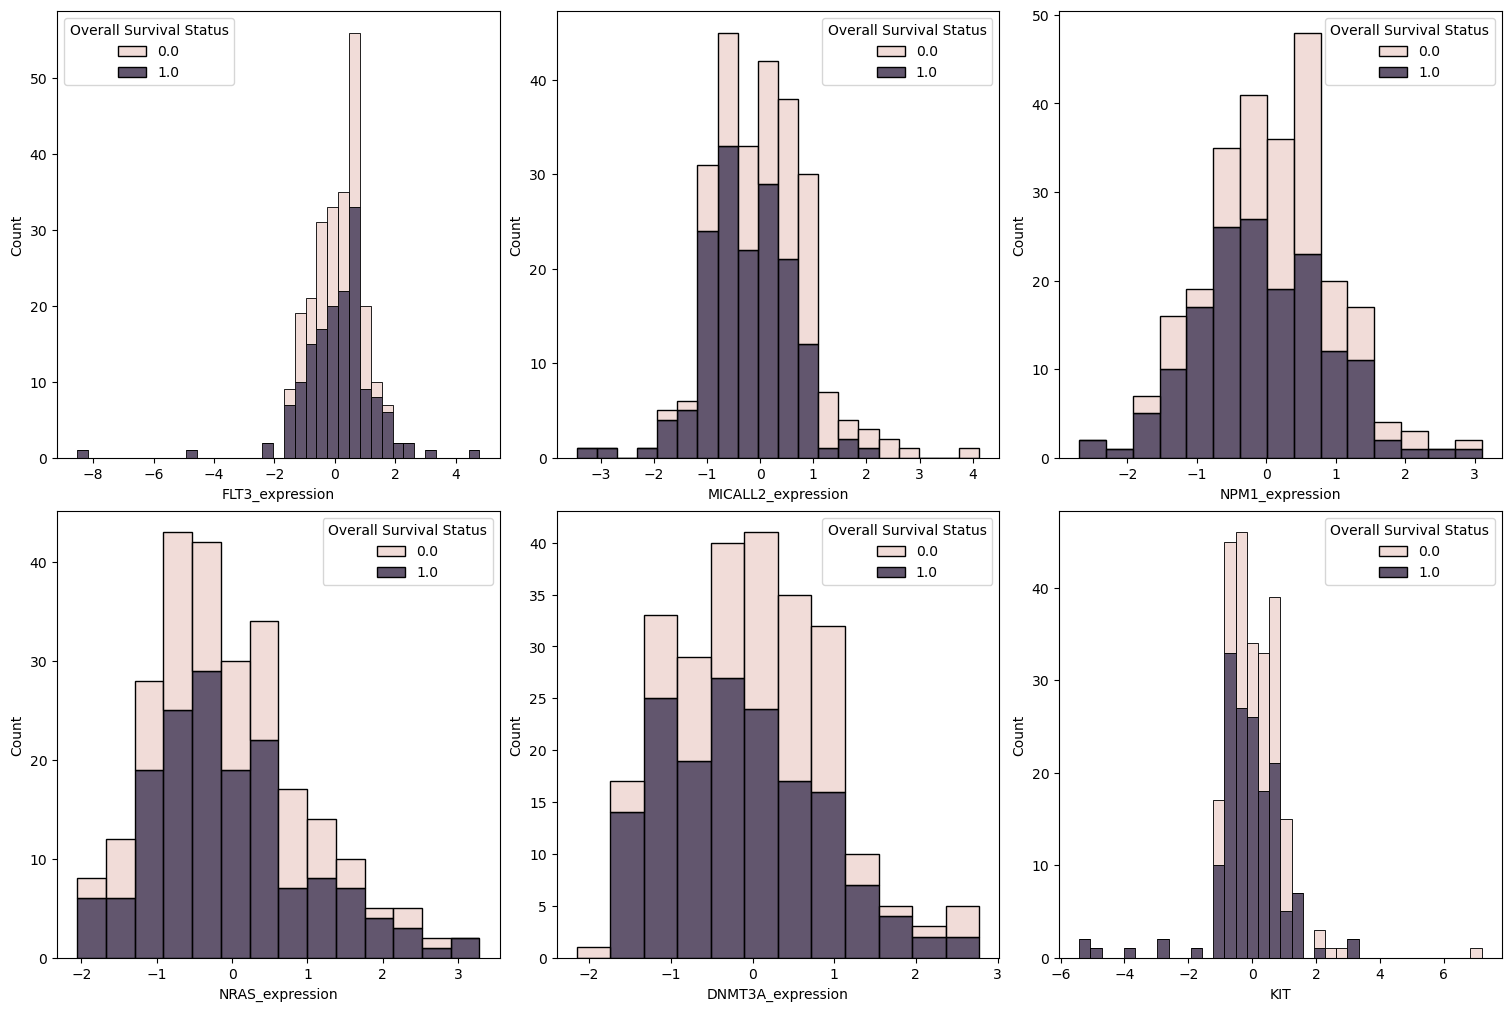

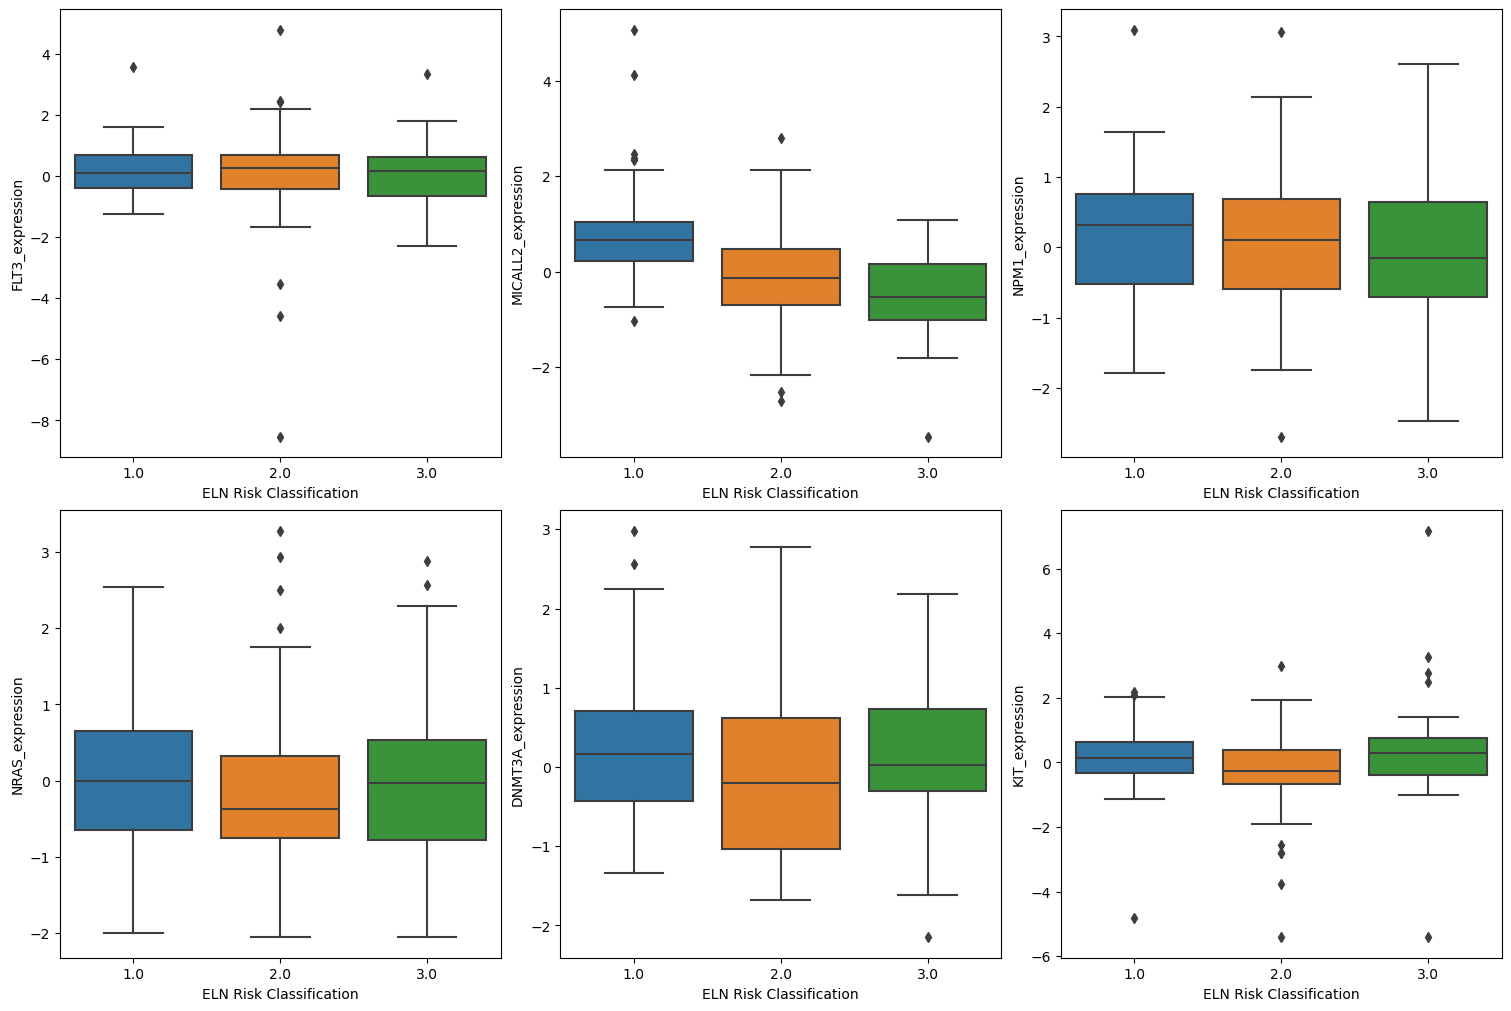

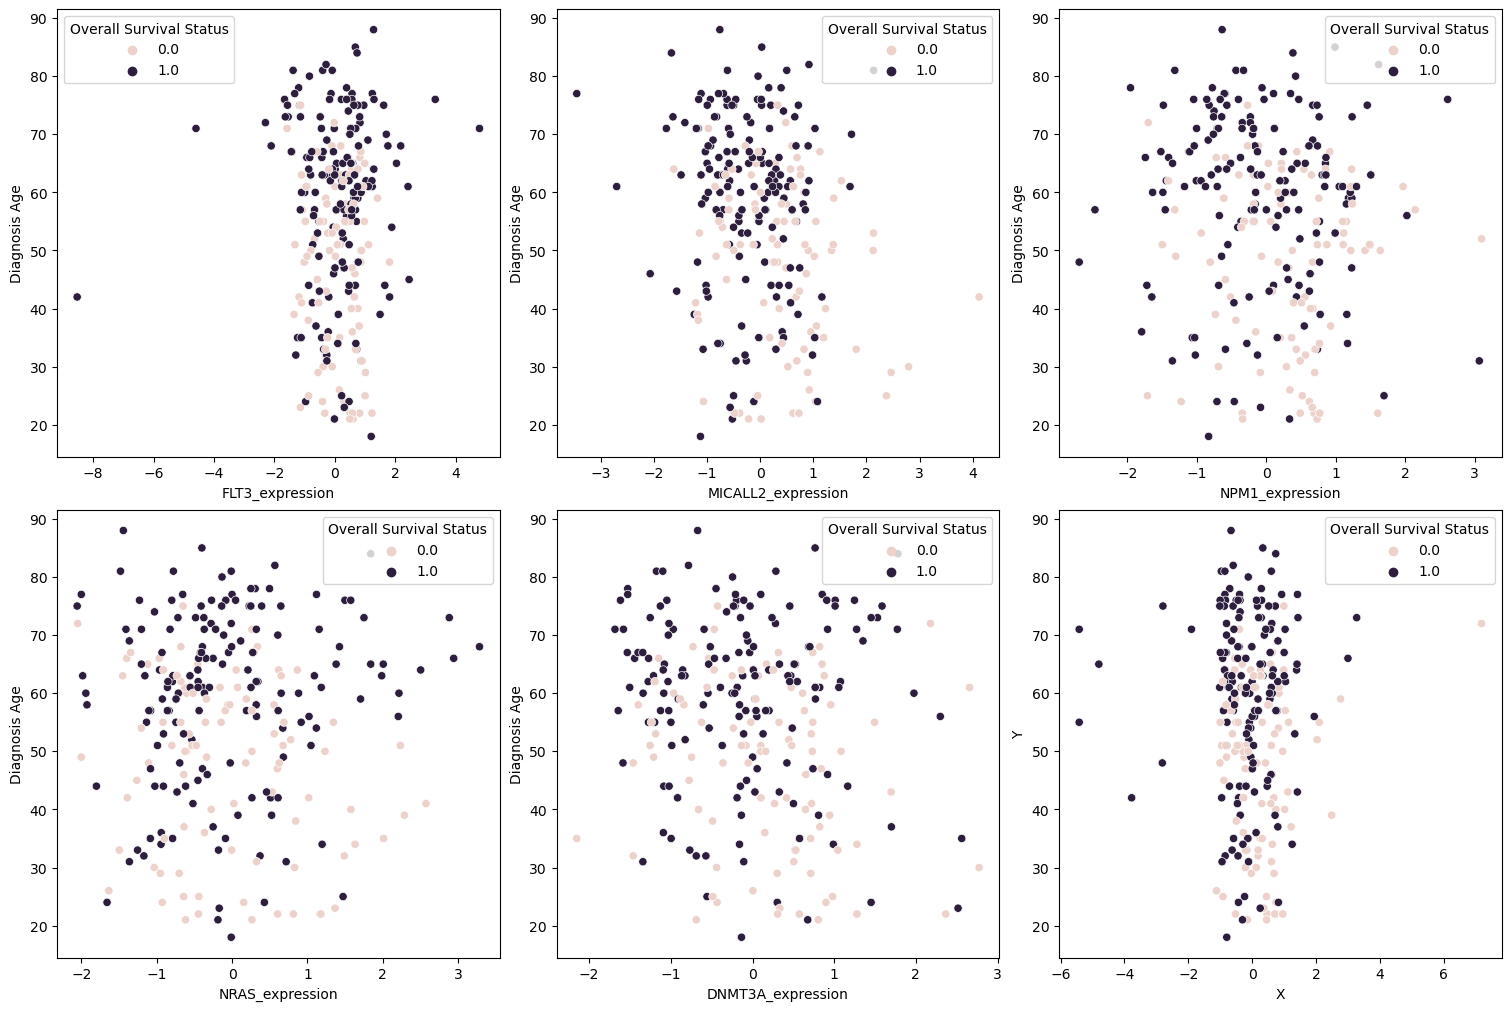

In [101]:
df_genetic_expression_data = df.loc[:, coluns_names['genetic_expression']]
df_clinical_data = df.loc[:, coluns_names['clinical']]
df_genetic_mutation_data = df.loc[:, coluns_names['genetic_mutation']]

fig, axes = plt.subplots(2, 3, constrained_layout=True, figsize=(15, 10))
histograma(df_genetic_expression_data['FLT3_expression'], train_class_ids['Overall Survival Status'], ax=axes[0, 0], xlabel='FLT3')
histograma(df_genetic_expression_data['MICALL2_expression'], train_class_ids['Overall Survival Status'], ax=axes[0, 1], xlabel='MICALL2')
histograma(df_genetic_expression_data['NPM1_expression'], train_class_ids['Overall Survival Status'], ax=axes[0, 2], xlabel='NPM1')
histograma(df_genetic_expression_data['NRAS_expression'], train_class_ids['Overall Survival Status'], ax=axes[1, 0], xlabel='NRAS')
histograma(df_genetic_expression_data['DNMT3A_expression'], train_class_ids['Overall Survival Status'], ax=axes[1, 1], xlabel='DNMT3A')
histograma(df_genetic_expression_data['KIT_expression'], train_class_ids['Overall Survival Status'], ax=axes[1, 2], xlabel='KIT')

fig, axes = plt.subplots(2, 3, constrained_layout=True, figsize=(15, 10))
boxplot(df_clinical_data['ELN Risk Classification'], df_genetic_expression_data['FLT3_expression'], xlabel='FLT3', ylabel='ELN Risk Classification', ax=axes[0, 0])
boxplot(df_clinical_data['ELN Risk Classification'], df_genetic_expression_data['MICALL2_expression'], xlabel='MICALL2', ylabel='ELN Risk Classification', ax=axes[0, 1])
boxplot(df_clinical_data['ELN Risk Classification'], df_genetic_expression_data['NPM1_expression'], xlabel='NPM1', ylabel='ELN Risk Classification', ax=axes[0, 2])
boxplot(df_clinical_data['ELN Risk Classification'], df_genetic_expression_data['NRAS_expression'], xlabel='NRAS', ylabel='ELN Risk Classification', ax=axes[1, 0])
boxplot(df_clinical_data['ELN Risk Classification'], df_genetic_expression_data['DNMT3A_expression'], xlabel='DNMT3A', ylabel='ELN Risk Classification', ax=axes[1, 1])
boxplot(df_clinical_data['ELN Risk Classification'], df_genetic_expression_data['KIT_expression'], xlabel='KIT', ylabel='ELN Risk Classification', ax=axes[1, 2])

fig, axes = plt.subplots(2, 3, constrained_layout=True, figsize=(15, 10))
grafico_de_dispersao(df_genetic_expression_data['FLT3_expression'], df_clinical_data['Diagnosis Age'], train_class_ids['Overall Survival Status'], ax=axes[0, 0])
grafico_de_dispersao(df_genetic_expression_data['MICALL2_expression'], df_clinical_data['Diagnosis Age'], train_class_ids['Overall Survival Status'], ax=axes[0, 1])
grafico_de_dispersao(df_genetic_expression_data['NPM1_expression'], df_clinical_data['Diagnosis Age'], train_class_ids['Overall Survival Status'], ax=axes[0, 2])
grafico_de_dispersao(df_genetic_expression_data['NRAS_expression'], df_clinical_data['Diagnosis Age'], train_class_ids['Overall Survival Status'], ax=axes[1, 0])
grafico_de_dispersao(df_genetic_expression_data['DNMT3A_expression'], df_clinical_data['Diagnosis Age'], train_class_ids['Overall Survival Status'], ax=axes[1, 1])
grafico_de_dispersao(df_genetic_expression_data['KIT_expression'], df_clinical_data['Diagnosis Age'], train_class_ids['Overall Survival Status'], ax=axes[1, 2])

## Relações entre atributos

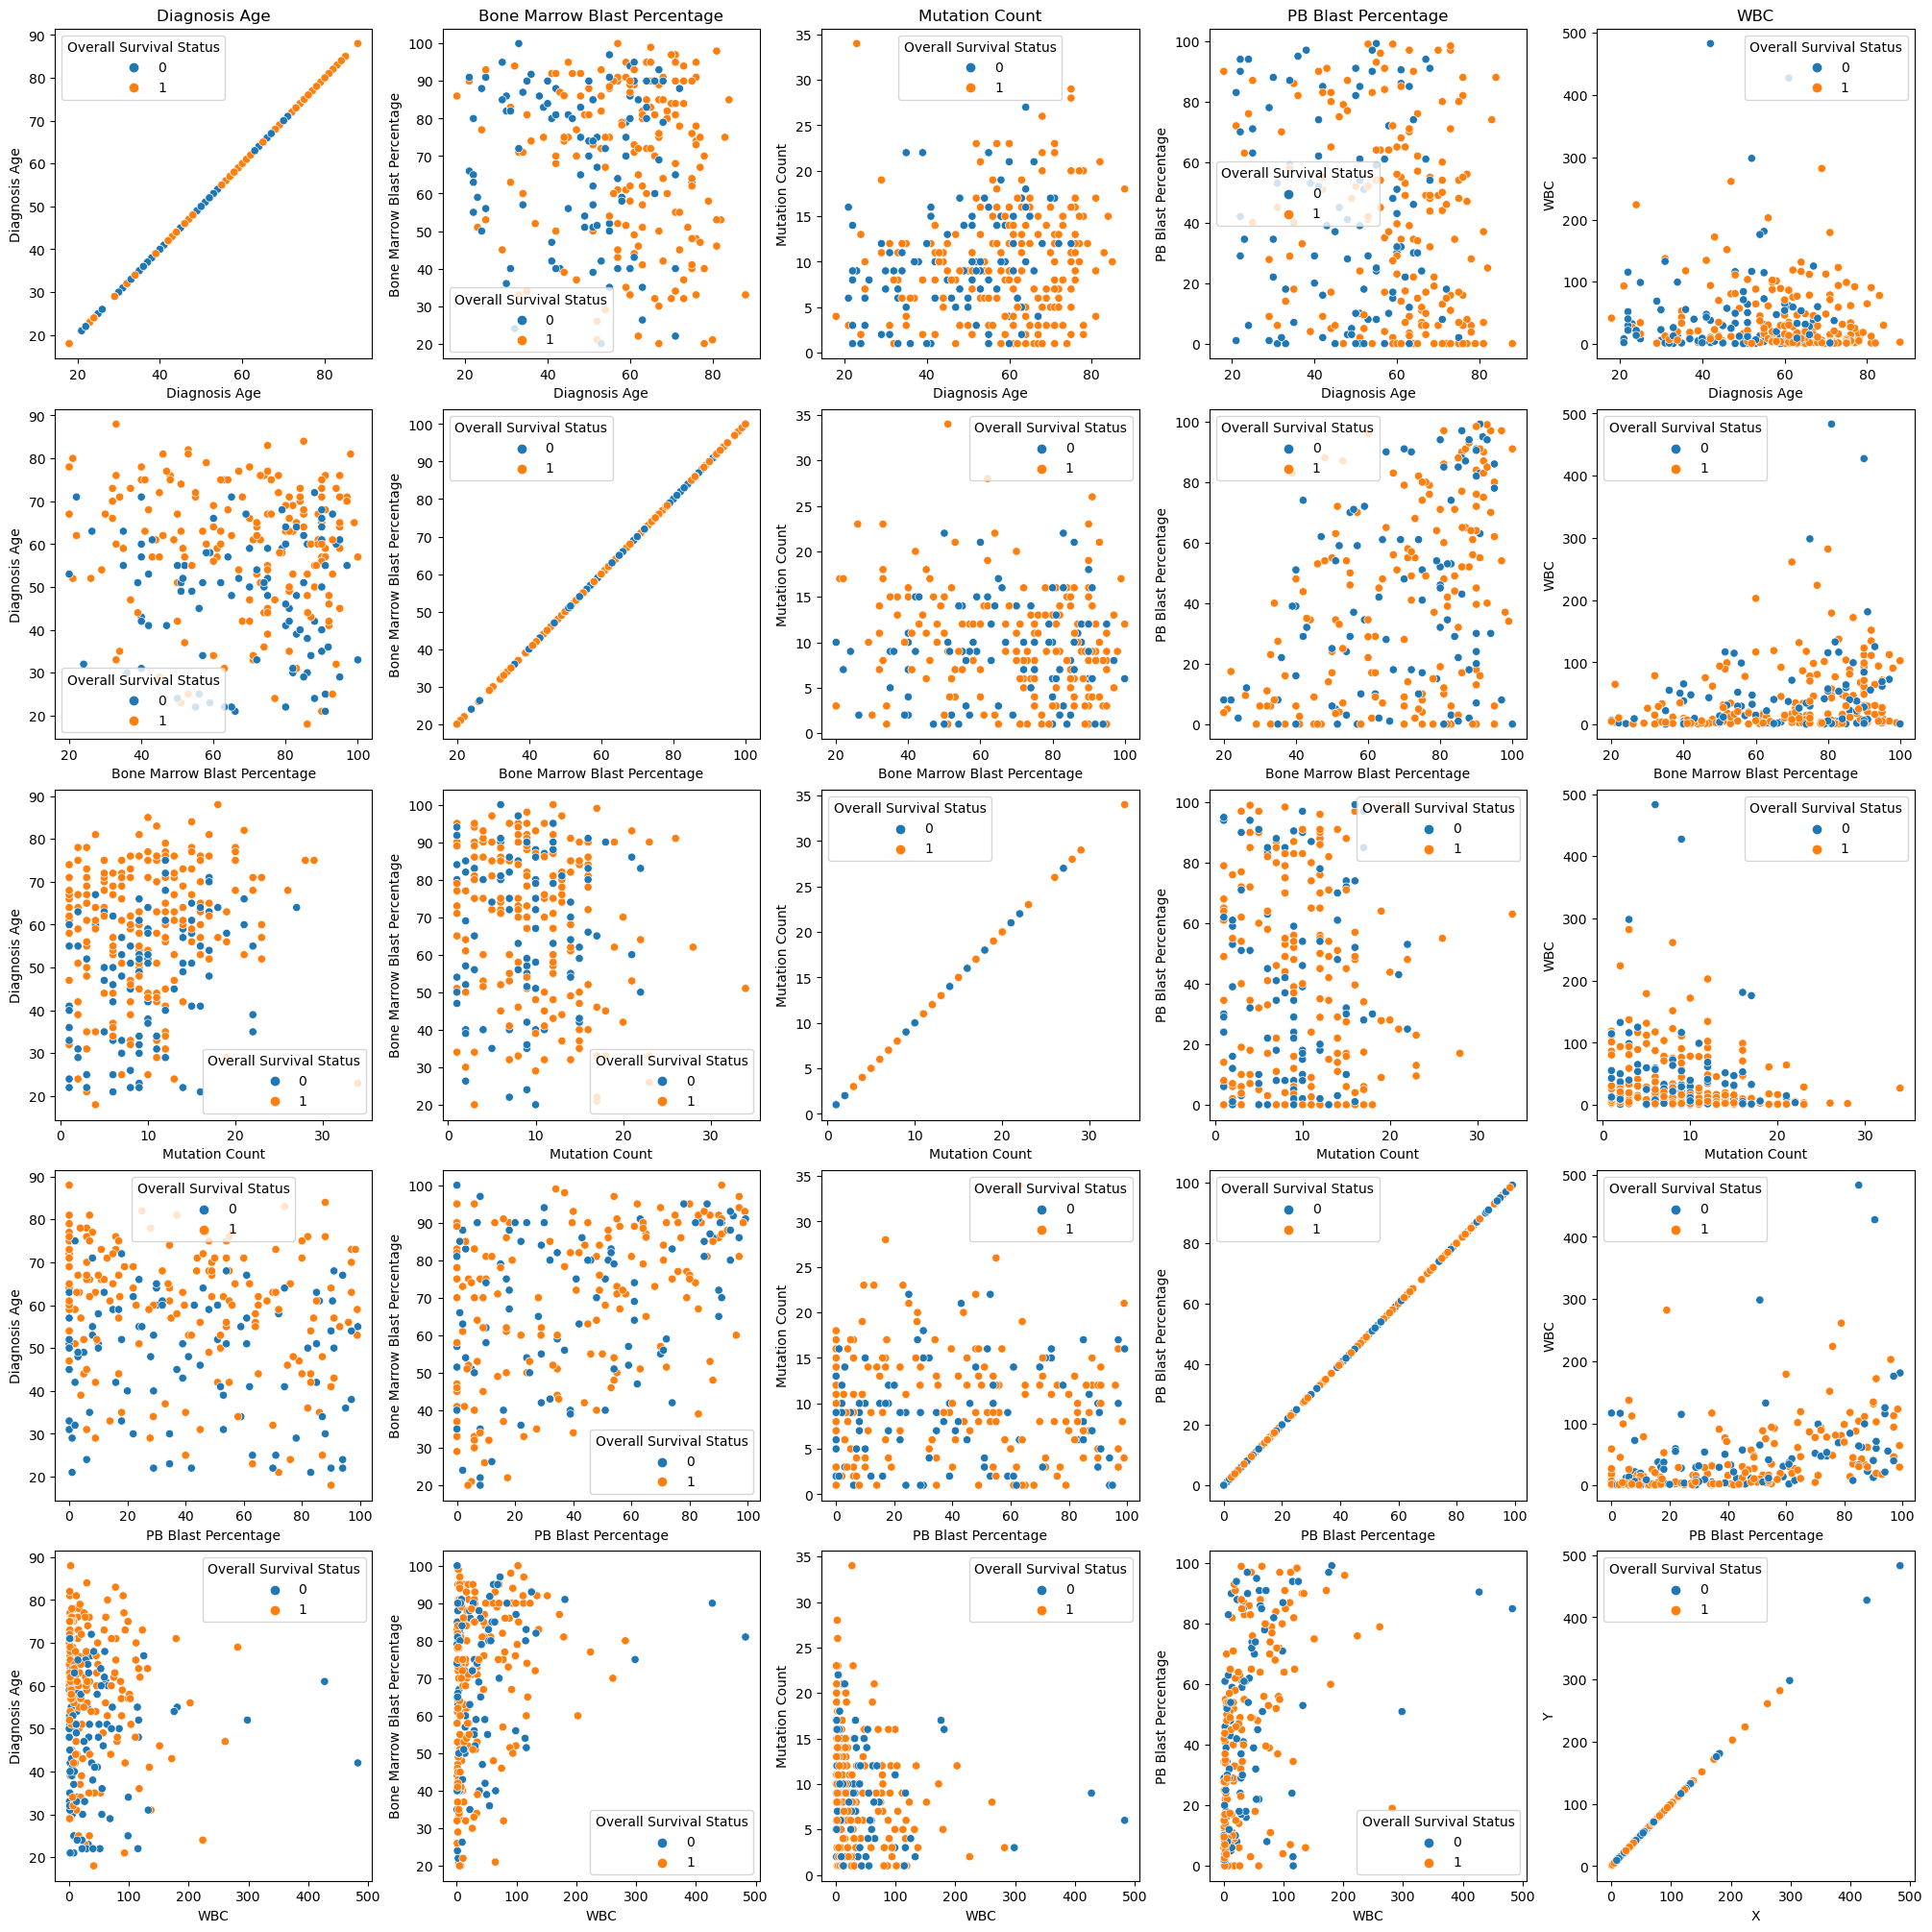

In [102]:
from scripts.analise_exploratoria import *

atributos = ['Diagnosis Age', 'Bone Marrow Blast Percentage', 'Mutation Count', 'PB Blast Percentage', 'WBC']

fig, axes = plt.subplots(len(atributos), len(atributos), constrained_layout=True, figsize=(20, 20))

for i in range(len(atributos)):
    for j in range(len(atributos)):
        if i == 0:
            axes[i, j].set_title(atributos[j])
        grafico_de_dispersao(df_train[atributos[i]], df_train[atributos[j]], train_class_ids['Overall Survival Status'], ax=axes[i, j])

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

#### Pré-processamento inicial
- Tratamento de atributos categóricos;
- Dados ausentes.

In [103]:
from scripts.preprocessamento import *

df, train_class_ids, test_ids, coluns_names = importar_dados(FILES_DIRECTORY)

df_clinical_data = df.loc[:, coluns_names['clinical']]
df = tratar_atributos_categoricos(df)
df_clinical_data = tratar_atributos_categoricos(df_clinical_data)
coluns_names['clinical'] = df_clinical_data.columns.values

df = tratar_faltantes(df, 3)

df_train = df.loc[train_class_ids.index]
df_test = df.loc[test_ids.index]
    
X = df_train.values
Y = train_class_ids.values.ravel()
X_test = df_test.values

#### Teste estatístico para escolha de quantidade de Features
- df_clinical data

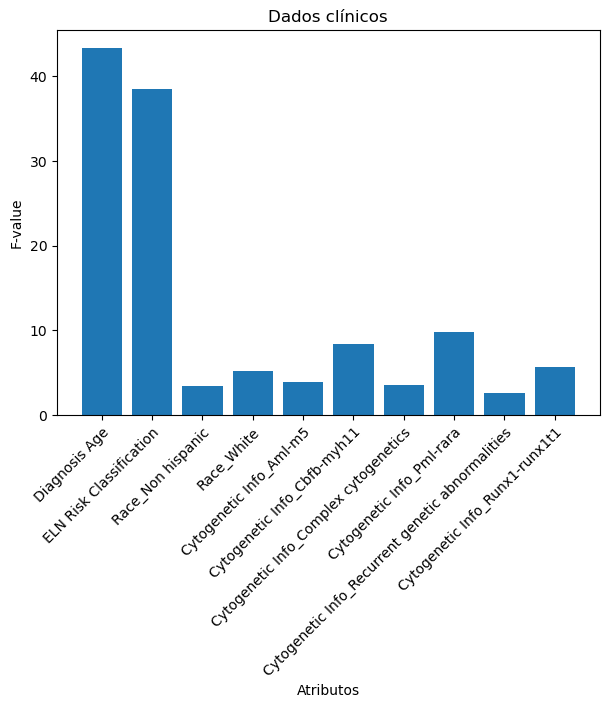

In [105]:
from scripts.preprocessamento import *

df_clinical_data = df_train.loc[:, coluns_names['clinical']]

df_clinical_data_i_best, f_values = selectKBest(df_clinical_data, train_class_ids['Overall Survival Status'], 10)

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(df_clinical_data_i_best.columns.values, f_values)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Dados clínicos')
ax.set_xlabel('Atributos')
ax.set_ylabel('F-value')
plt.show()

  - genetic_mutation_data

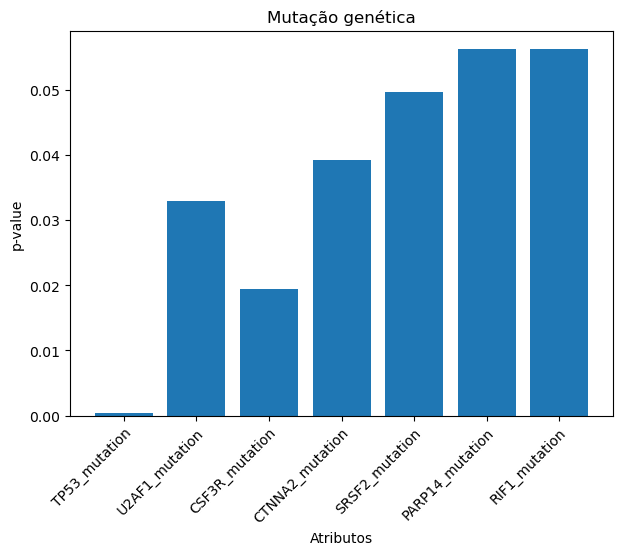

In [106]:
from scripts.preprocessamento import *

df_genetic_mutation_data = df_train.loc[:, coluns_names['genetic_mutation']]
df_genetic_mutation_data = df_genetic_mutation_data.loc[:, (df_genetic_mutation_data != df_genetic_mutation_data.iloc[0]).any()]

df_genetic_mutation_data_i_best, p_values = selectKBestChi2(df_genetic_mutation_data, train_class_ids['Overall Survival Status'], 7)

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(df_genetic_mutation_data_i_best.columns.values, p_values)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Mutação genética')
ax.set_xlabel('Atributos')
ax.set_ylabel('p-value')
plt.show()


- genetic_expression_data

Quantidade de f_valores maiores que 19:  19


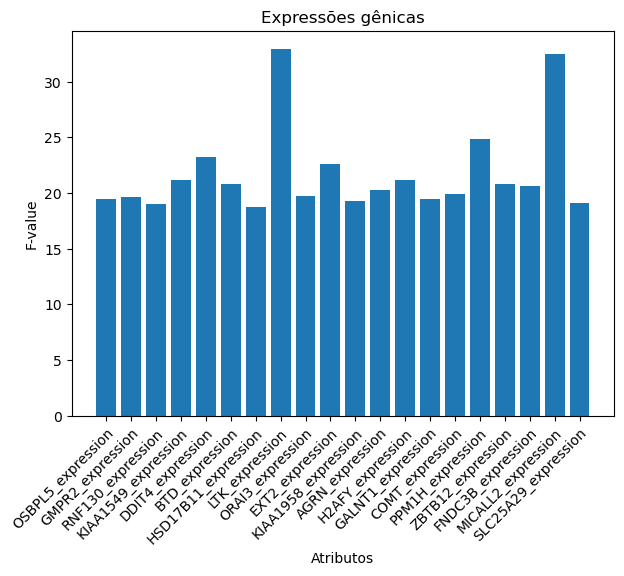

In [107]:
from scripts.preprocessamento import *
import matplotlib.pyplot as plt

df_genetic_expression_data = df_train.loc[:, coluns_names['genetic_expression']]

df_genetic_expression_data_i_best, f_values = selectKBest(df_genetic_expression_data, train_class_ids['Overall Survival Status'], 20)
print('Quantidade de f_valores maiores que 19: ', len(f_values[f_values > 19]))

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(df_genetic_expression_data_i_best.columns.values, f_values)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Expressões gênicas')
ax.set_xlabel('Atributos')
ax.set_ylabel('F-value')
plt.show()


#### Seleção individual em cada dataset

In [108]:
from scripts.preprocessamento import *

df_clinical_data = df_train.loc[:, coluns_names['clinical']]
df_genetic_expression_data = df_train.loc[:, coluns_names['genetic_expression']]
df_genetic_mutation_data = df_train.loc[:, coluns_names['genetic_mutation']]

df_clinical_data, _ = selectKBest(df_clinical_data, train_class_ids['Overall Survival Status'].values.ravel(), 2)
coluns_names['clinical'] = df_clinical_data.columns.values
    
df_genetic_mutation_data, _ = selectKBestChi2(df_genetic_mutation_data, train_class_ids['Overall Survival Status'].values.ravel(), 5)
coluns_names['genetic_mutation'] = df_genetic_mutation_data.columns.values

df_genetic_expression_data, _ = selectKBest(df_genetic_expression_data, train_class_ids['Overall Survival Status'].values.ravel(), 19)
coluns_names['genetic_expression'] = df_genetic_expression_data.columns.values

print('Colunas selecionadas: ', coluns_names['clinical'])
print('Colunas selecionadas: ', coluns_names['genetic_expression'])
print('Colunas selecionadas: ', coluns_names['genetic_mutation'])

columns = coluns_names['clinical'].tolist() + coluns_names['genetic_expression'].tolist() + coluns_names['genetic_mutation'].tolist()
df = df[columns]

display(df.head())

df_train = df.loc[train_class_ids.index]
df_test = df.loc[test_ids.index]

X = df_train.values
Y = train_class_ids.values.ravel()
X_test = df_test.values

Colunas selecionadas:  ['Diagnosis Age' 'ELN Risk Classification']
Colunas selecionadas:  ['OSBPL5_expression' 'GMPR2_expression' 'RNF130_expression'
 'KIAA1549_expression' 'DDIT4_expression' 'BTD_expression'
 'LTK_expression' 'ORAI3_expression' 'EXT2_expression'
 'KIAA1958_expression' 'AGRN_expression' 'H2AFY_expression'
 'GALNT1_expression' 'COMT_expression' 'PPM1H_expression'
 'ZBTB12_expression' 'FNDC3B_expression' 'MICALL2_expression'
 'SLC25A29_expression']
Colunas selecionadas:  ['TP53_mutation' 'U2AF1_mutation' 'CSF3R_mutation' 'CTNNA2_mutation'
 'SRSF2_mutation']


,Diagnosis Age,ELN Risk Classification,OSBPL5_expression,GMPR2_expression,RNF130_expression,KIAA1549_expression,DDIT4_expression,BTD_expression,LTK_expression,ORAI3_expression,...,PPM1H_expression,ZBTB12_expression,FNDC3B_expression,MICALL2_expression,SLC25A29_expression,TP53_mutation,U2AF1_mutation,CSF3R_mutation,CTNNA2_mutation,SRSF2_mutation
Sample ID,,,,,,,,,,,,,,,,,,,,,
id-2802-03,50.0,2.0,0.304300,0.350100,0.025633,-0.023333,0.335233,-0.549833,-0.935700,0.379367,...,-2.214367,-0.5179,-0.283767,-0.204533,0.783200,0.0,0.0,0.0,0.0,0.0
id-2803-03,61.0,1.0,1.102500,0.917200,2.321200,-0.976300,-0.029700,-0.939300,0.950900,1.755300,...,1.433100,0.4200,2.874800,1.690400,0.852600,0.0,0.0,0.0,0.0,0.0
id-2804-03,30.0,2.0,1.142733,0.652167,0.322533,0.205833,0.083000,-0.343633,0.221333,0.781867,...,0.232600,0.2499,0.191733,0.733700,0.928167,0.0,0.0,0.0,0.0,0.0
id-2805-03,77.0,2.0,-0.990600,-0.485700,0.315700,-1.254300,-0.201400,0.014100,-0.545400,-0.922900,...,-1.221300,-1.0314,-0.581500,-1.113000,-1.079200,0.0,0.0,0.0,0.0,0.0
id-2806-03,46.0,1.0,-0.638900,-0.453600,0.552500,2.161700,-0.605000,0.942200,-0.047700,-0.075700,...,2.165800,0.9496,0.822900,-1.039500,-0.393800,0.0,0.0,0.0,0.0,0.0


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [109]:
from scripts.experimentos import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

K_FOLD = 10
resultados = pd.DataFrame(columns=['Modelo', 'Score', 'Melhores Parâmetros'])

knn_parametros = { 'n_neighbors': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99] }
kNeighbors, best_params, best_score  = init_model(KNeighborsClassifier(), X, Y, knn_parametros, K_FOLD)
resultados = pd.concat([resultados, pd.DataFrame([{'Modelo': 'KNN', 'Score': best_score, 'Melhores Parâmetros': best_params}])])

naive_bayes_parametros = { 'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7] }
naiveBayes, best_params, best_score  = init_model(GaussianNB(), X, Y, naive_bayes_parametros, K_FOLD)
resultados = pd.concat([resultados, pd.DataFrame([{'Modelo': 'Naive Bayes', 'Score': best_score, 'Melhores Parâmetros': best_params}])])

logistic_parametros = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [10000] }
logisticRegression, best_params, best_score = init_model(LogisticRegression(), X, Y, logistic_parametros, K_FOLD)
resultados = pd.concat([resultados, pd.DataFrame([{'Modelo': 'Regressão Logistíca', 'Score': best_score, 'Melhores Parâmetros': best_params}])])
 
rna_parametros = { 'hidden_layer_sizes': [(50,), (70,), (90,), (100,)] , 'max_iter': [10000]}
neuralNetwork, best_params, best_score = init_model(MLPClassifier(), X, Y, rna_parametros, K_FOLD)
resultados = pd.concat([resultados, pd.DataFrame([{'Modelo': 'RNA', 'Score': best_score, 'Melhores Parâmetros': best_params}])])

svm_parametros = { 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'probability': [True]}
supportVectorMachines, best_params, best_score = init_model(SVC(), X, Y, svm_parametros, K_FOLD)
resultados = pd.concat([resultados, pd.DataFrame([{'Modelo': 'SVM', 'Score': best_score, 'Melhores Parâmetros': best_params}])])

random_forest_parametros = { 'n_estimators': [400, 500, 600, 700, 800]}
randomForest, best_params, best_score = init_model(RandomForestClassifier(), X, Y, random_forest_parametros, K_FOLD)
resultados = pd.concat([resultados, pd.DataFrame([{'Modelo': 'Random Forest', 'Score': best_score, 'Melhores Parâmetros': best_params}])])

resultados = resultados.sort_values(by='Score', ascending=False).reset_index(drop=True)

display(resultados)

,Modelo,Score,Melhores Parâmetros
0,SVM,0.818896,"{'C': 100, 'probability': True}"
1,Regressão Logistíca,0.817083,"{'C': 0.1, 'max_iter': 10000}"
2,Naive Bayes,0.795060,{'var_smoothing': 1e-11}
3,RNA,0.778777,"{'hidden_layer_sizes': (90,), 'max_iter': 10000}"
4,Random Forest,0.774445,{'n_estimators': 500}
5,KNN,0.762048,{'n_neighbors': 13}


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

,Roc auc,Accuracy,F1,Recall,Precision
KNeighborsClassifier,0.653258,0.715323,0.796326,0.863333,0.743975


,Predicted 0,Predicted 1,Precision,Recall
Real 0,5.0,6.2,0.714286,0.454545
Real 1,2.8,17.6,0.739130,0.894737


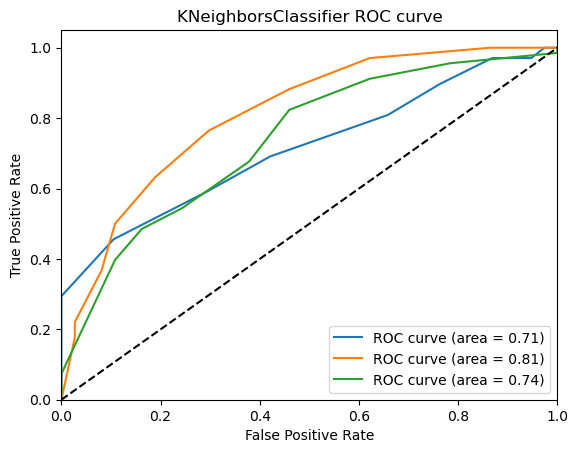

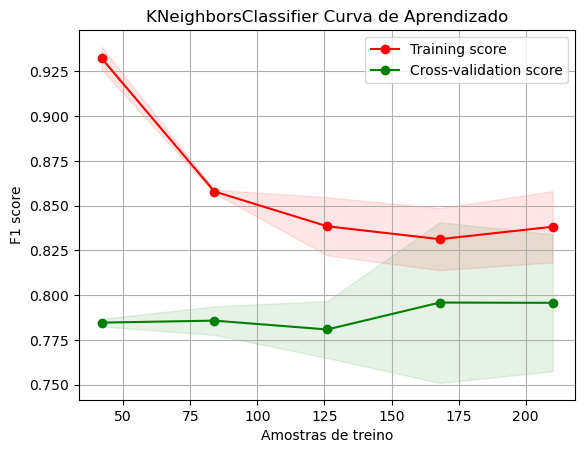

,Roc auc,Accuracy,F1,Recall,Precision
GaussianNB,0.629675,0.702016,0.783908,0.870714,0.733517


,Predicted 0,Predicted 1,Precision,Recall
Real 0,4.4,6.8,0.666667,0.400000
Real 1,2.6,17.8,0.739130,0.894737


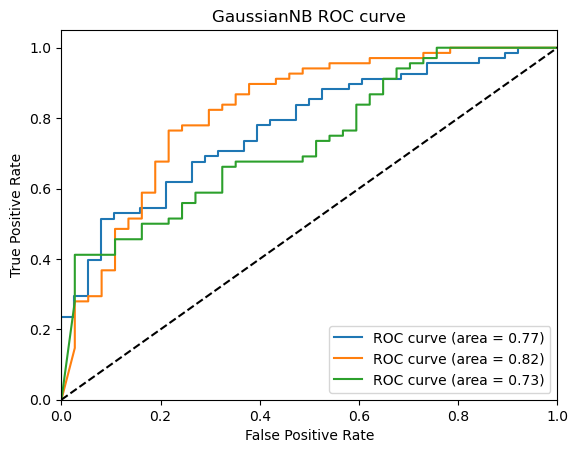

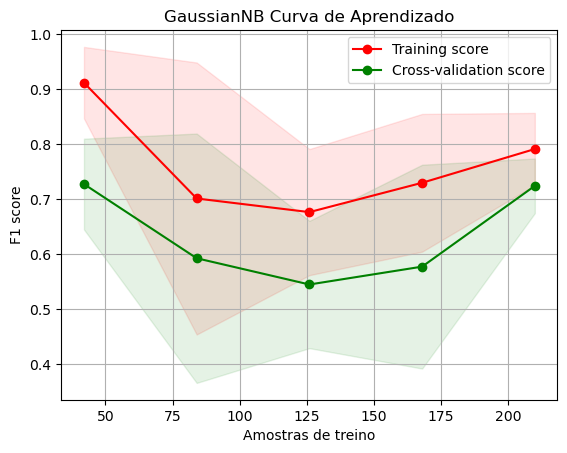

,Roc auc,Accuracy,F1,Recall,Precision
LogisticRegression,0.686147,0.737601,0.805961,0.857143,0.767044


,Predicted 0,Predicted 1,Precision,Recall
Real 0,5.8,5.4,0.714286,0.500000
Real 1,2.9,17.5,0.772727,0.894737


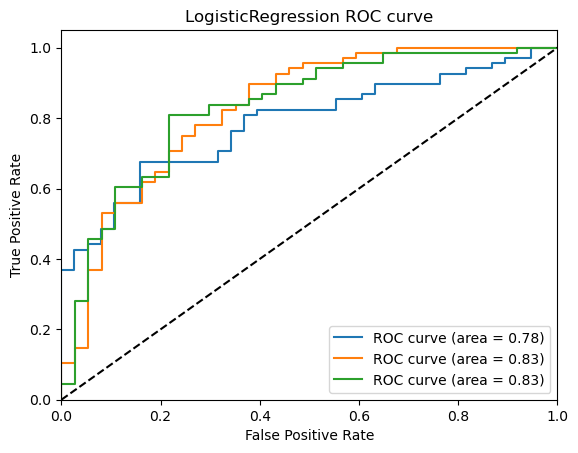

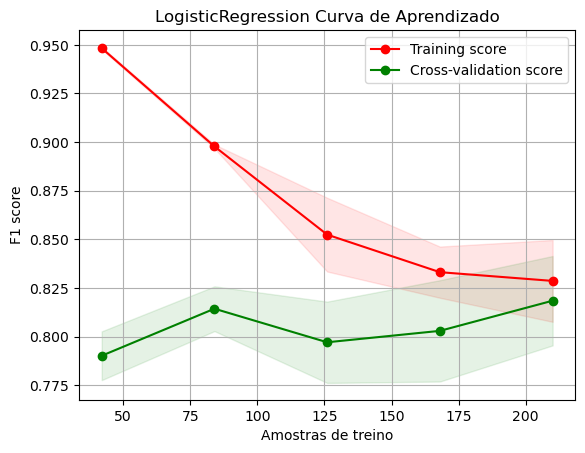

,Roc auc,Accuracy,F1,Recall,Precision
MLPClassifier,0.679275,0.705746,0.765776,0.763095,0.78106


,Predicted 0,Predicted 1,Precision,Recall
Real 0,6.7,4.5,0.600000,0.600000
Real 1,4.8,15.6,0.789474,0.789474


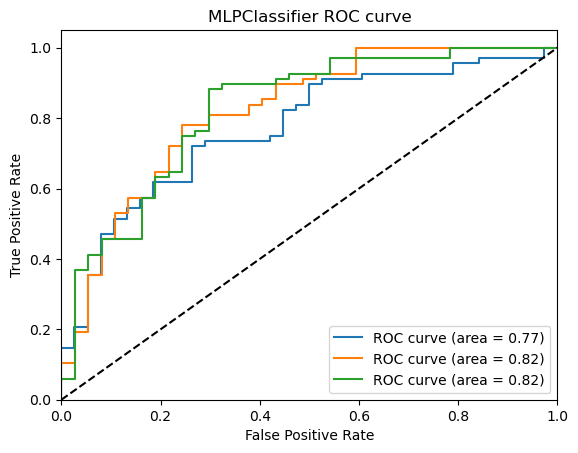

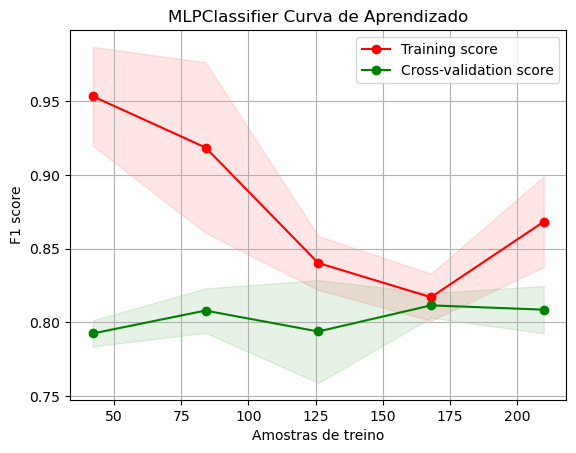

,Roc auc,Accuracy,F1,Recall,Precision
SVC,0.699405,0.746976,0.810818,0.857143,0.776633


,Predicted 0,Predicted 1,Precision,Recall
Real 0,6.1,5.1,0.750000,0.545455
Real 1,2.9,17.5,0.772727,0.894737


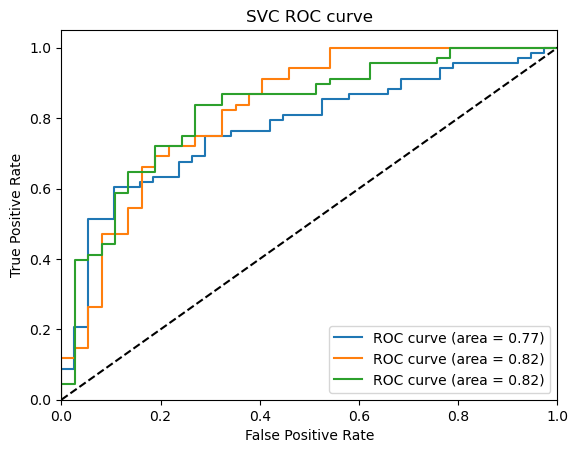

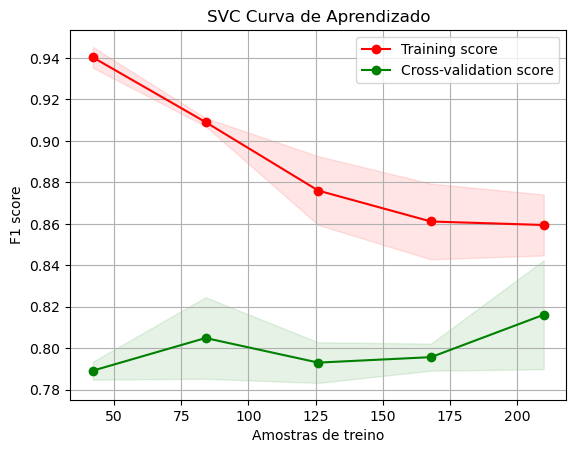

,Roc auc,Accuracy,F1,Recall,Precision
RandomForestClassifier,0.652056,0.705544,0.780371,0.832143,0.743961


,Predicted 0,Predicted 1,Precision,Recall
Real 0,5.3,5.9,0.625000,0.50
Real 1,3.4,17.0,0.772727,0.85


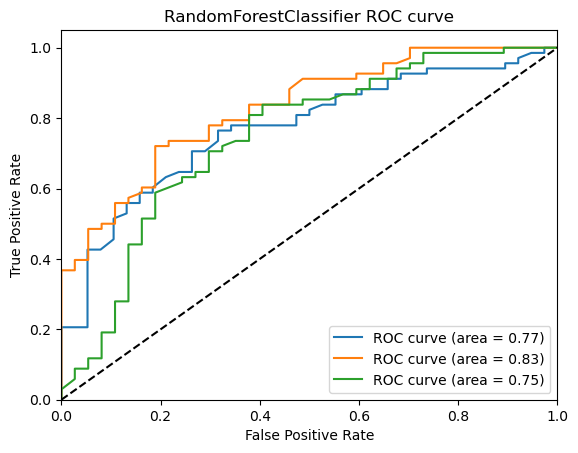

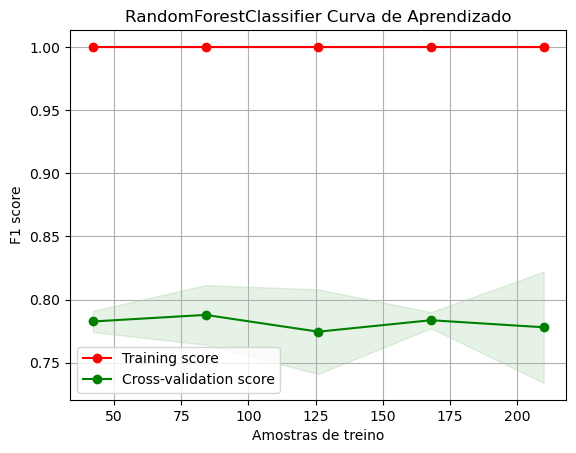

In [110]:
from scripts.analise_resultados import *

resultados = pd.DataFrame([])

resultado, matriz_de_confusao = report(kNeighbors, X, Y)
display(resultado)
display(matriz_de_confusao)
resultados = pd.concat([resultados, resultado])
plot_roc_curve(kNeighbors, X, Y)
plot_learning_curve(kNeighbors, X, Y)

resultado, matriz_de_confusao = report(naiveBayes, X, Y)
display(resultado)
display(matriz_de_confusao)
resultados = pd.concat([resultados, resultado])
plot_roc_curve(naiveBayes, X, Y)
plot_learning_curve(naiveBayes, X, Y)

resultado, matriz_de_confusao = report(logisticRegression, X, Y)
display(resultado)
display(matriz_de_confusao)
resultados = pd.concat([resultados, resultado])
plot_roc_curve(logisticRegression, X, Y)
plot_learning_curve(logisticRegression, X, Y)

resultado, matriz_de_confusao = report(neuralNetwork, X, Y)
display(resultado)
display(matriz_de_confusao)
resultados = pd.concat([resultados, resultado])
plot_roc_curve(neuralNetwork, X, Y)
plot_learning_curve(neuralNetwork, X, Y)

resultado, matriz_de_confusao = report(supportVectorMachines, X, Y)
display(resultado)
display(matriz_de_confusao)
resultados = pd.concat([resultados, resultado])
plot_roc_curve(supportVectorMachines, X, Y) 
plot_learning_curve(supportVectorMachines, X, Y)

resultado, matriz_de_confusao= report(randomForest, X, Y)
display(resultado)
display(matriz_de_confusao)
resultados = pd.concat([resultados, resultado])
plot_roc_curve(randomForest, X, Y)
plot_learning_curve(randomForest, X, Y)


In [85]:
from datetime import datetime

TIMESTAMP = datetime.now().strftime("%Y%m%d-%H%M%S")

if not os.path.exists('results'):
    os.makedirs('results')

if not os.path.exists('results/' + TIMESTAMP):
    os.makedirs('results/' + TIMESTAMP)
    
predict_and_save(kNeighbors, X_test, test_ids.index, 'results/' + TIMESTAMP + '/knn' + TIMESTAMP + '.csv')
predict_and_save(naiveBayes, X_test, test_ids.index, 'results/' + TIMESTAMP + '/naive_bayes' + TIMESTAMP + '.csv')
predict_and_save(logisticRegression, X_test, test_ids.index, 'results/' + TIMESTAMP + '/logistic_regression' + TIMESTAMP + '.csv')
predict_and_save(neuralNetwork, X_test, test_ids.index, 'results/' + TIMESTAMP + '/rna' + TIMESTAMP + '.csv')
predict_and_save(supportVectorMachines, X_test, test_ids.index, 'results/' + TIMESTAMP + '/svm' + TIMESTAMP + '.csv')
predict_and_save(randomForest, X_test, test_ids.index, 'results/' + TIMESTAMP + '/random_forest' + TIMESTAMP + '.csv')

print(TIMESTAMP)

20230317-124805
